# System3_comparison.ipynb

JRM33モデルのフットプリント位置予測を用いる。

### 衛星のSystem III経度に対して、フットプリント位置予測をプロットする。

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import B_JRM33 as BJRM
import B_equator as BEQ
from TScmap import TScmap

# matplotlib フォント設定
fontname = 'Nimbus Sans'
plt.rcParams.update({'font.sans-serif': fontname,
                     'font.family': 'sans-serif',
                     'mathtext.fontset': 'custom',
                     'mathtext.rm': fontname,
                     'mathtext.it': fontname+':italic',
                     # 'mathtext.bf': 'Nimbus Sans:italic:bold',
                     'mathtext.bf': fontname+':bold'
                     })

In [3]:
satovalN = np.recfromtxt('data/JRM33/satellite_foot_N.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

satovalS = np.recfromtxt('data/JRM33/satellite_foot_S.txt', skip_header=3,
                names=['wlon', 'amlat', 'amwlon', 'iolat', 'iowlon', 'eulat', 'euwlon', 'galat', 'gawlon'])

In [4]:
# EFP見えている
OBS_s3moonN = np.array([
    139,102,92.5,170.5
])

OBS_s3efpN = np.array([
    156.5,143.5,140,169.5
])

OBS_s3moonS = np.array([
    93,71,90.5
])

OBS_s3efpS = np.array([
    77,64,76
])

# EFP見えなかった
NO_s3moonN = np.array([
    266.5,158,194.5,211,189,195,189.5,228,192
])

NO_s3efpN = np.array([
    225,164.5,180.5,188.5,178,180.5,177,198,179.5
])

NO_s3moonS = np.array([
    309,338.5,333.5,320
])

NO_s3efpS = np.array([
    325.5,353,346,334.5
])

In [5]:
RJ = 71492E+3           # JUPITER RADIUS [m]
r = 9.4*RJ
theta = np.radians(90)
phi = np.radians(np.linspace(0,360,180))
B = np.zeros(phi.shape)
Br = np.zeros(phi.shape)
Btheta = np.zeros(phi.shape)
for i in range(phi.size):
    Bvec = BJRM.B().JRM33(r, theta, phi[i])
    B[i] = np.sqrt(Bvec[0]**2+Bvec[1]**2+Bvec[2]**2)
    Br[i] = Bvec[0]
    Btheta[i] = Bvec[1]


北半球 ... EuropaのSys3経度がEFPモデル(JRM33)よりも先行している場合に発光あり

南半球 ... EuropaのSys3経度がEFPモデル(JRM33)よりも遅延している場合に発光あり

メモ: 磁気緯度もプロットしたら何か見えるかもしれない。磁気緯度はどうやって計算する？

→ JRM33モデルの$\theta$と$\phi$は地理座標でOKなので、Europaの位置は$(r,\ \theta,\ \phi)=(9.4 R_J,\ 0,\ \lambda_{\rm III})$でOK。

Deimosで計算しよう。。。

In [6]:
# 北半球
wlonN0 = copy.copy(satovalN.wlon[0:4])
wlonN1 = copy.copy(satovalN.wlon[2:])

euwlonN0 = copy.copy(satovalN.euwlon[0:4])
euwlonN1 = copy.copy(satovalN.euwlon[2:])
euwlonN0[3] += 360
euwlonN1[0] += -360

# 南半球
print(satovalS.wlon)
print(satovalS.euwlon)

wlonS0 = copy.copy(satovalS.wlon[0:-1])
wlonS1 = copy.copy(satovalS.wlon[-3:])

euwlonS0 = copy.copy(satovalS.euwlon[0:-1])
euwlonS1 = copy.copy(satovalS.euwlon[-3:])
euwlonS0[-1] += 360
euwlonS1[0] += -360

print(euwlonS1)

[  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120 125 130 135 140 145 150 155 160 165 170 175
 180 185 190 195 200 205 210 215 220 225 230 235 240 245 250 255 260 265
 270 275 280 285 290 295 300 305 310 315 320 325 330 335 340 345 350 355
 360]
[  7.7   11.88  16.1   20.36  24.67  29.02  33.37  37.68  41.88  45.92
  49.76  53.41  56.87  60.2   63.41  66.55  69.65  72.73  75.83  78.95
  82.12  85.36  88.68  92.11  95.68  99.42 103.4  107.64 112.19 117.04
 122.18 127.6  133.32 139.4  145.96 153.2  161.31 170.4  180.41 190.94
 201.39 211.26 220.28 228.46 235.92 242.83 249.32 255.48 261.39 267.08
 272.55 277.8  282.84 287.68 292.34 296.85 301.24 305.55 309.8  314.01
 318.19 322.36 326.51 330.65 334.78 338.9  343.   347.11 351.21 355.31
 359.43   3.55   7.7 ]
[-0.57  3.55  7.7 ]


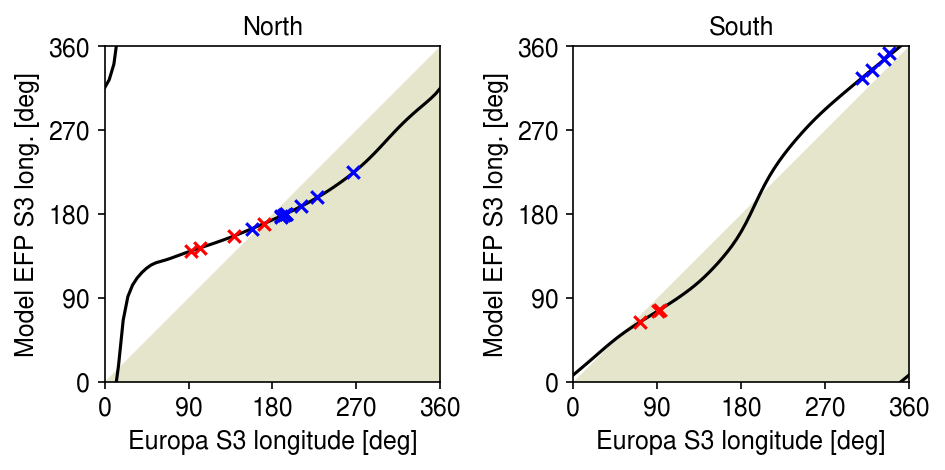

In [7]:
fontsize = 12
fig, ax = plt.subplots(1,2,dpi=150)
ax[0].set_aspect('equal')
ax[0].set_title('North', fontsize=fontsize)
ax[0].set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax[0].set_ylabel('Model EFP S3 long. [deg]', fontsize=fontsize)
ax[0].set_xlim(0,360)
ax[0].set_ylim(0,360)
ax[0].set_xticks(np.linspace(0,360,5))
ax[0].set_xticklabels(np.linspace(0,360,5,dtype=int))
ax[0].set_yticks(np.linspace(0,360,5))
ax[0].set_yticklabels(np.linspace(0,360,5,dtype=int))
ax[0].tick_params(axis='x', labelsize=fontsize)
ax[0].tick_params(axis='y', labelsize=fontsize)
# ax[0].plot(satovalN.wlon, satovalN.euwlon, zorder=0.5)
ax[0].plot(wlonN0, euwlonN0, color='k', zorder=0.5)
ax[0].plot(wlonN1, euwlonN1, color='k', zorder=0.5)

for i in range(OBS_s3moonN.size):
    ax[0].scatter(OBS_s3moonN[i], OBS_s3efpN[i], marker='x', color='r', zorder=1)
for i in range(NO_s3moonN.size):
    ax[0].scatter(NO_s3moonN[i], NO_s3efpN[i], marker='x', color='b', zorder=1)
# ax[0].plot(np.arange(0,360+1,5),np.arange(0,360+1,5), color='k', zorder=0.5)
ax[0].fill_between([0, 360], [0, 360], facecolor='olive', alpha=0.20, zorder=0.1)

#ax1 = ax[0].twinx()
#ax1.set_ylabel('$B_r$ [nT]')
#ax1.plot(np.degrees(2*np.pi-phi),Br, color='gray', zorder=0.5)

ax[0].set_box_aspect(1)

ax[1].set_aspect('equal')
ax[1].set_title('South', fontsize=fontsize)
ax[1].set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax[1].set_ylabel('Model EFP S3 long. [deg]', fontsize=fontsize)
ax[1].set_xlim(0,360)
ax[1].set_ylim(0,360)
ax[1].set_xticks(np.linspace(0,360,5))
ax[1].set_xticklabels(np.linspace(0,360,5,dtype=int))
ax[1].set_yticks(np.linspace(0,360,5))
ax[1].set_yticklabels(np.linspace(0,360,5,dtype=int))
ax[1].tick_params(axis='x', labelsize=fontsize)
ax[1].tick_params(axis='y', labelsize=fontsize)
# ax[1].plot(satovalS.wlon, satovalS.euwlon, zorder=0.5)
ax[1].plot(wlonS0, euwlonS0, color='k', zorder=0.5)
ax[1].plot(wlonS1, euwlonS1, color='k', zorder=0.5)

for i in range(OBS_s3moonS.size):
    ax[1].scatter(OBS_s3moonS[i], OBS_s3efpS[i], marker='x', color='r', zorder=1)
for i in range(NO_s3moonS.size):
    ax[1].scatter(NO_s3moonS[i], NO_s3efpS[i], marker='x', color='b', zorder=1)
# ax[1].plot(np.arange(0,360+1,5),np.arange(0,360+1,5), color='k', zorder=0.5)
ax[1].fill_between([0, 360], [0, 360], facecolor='olive', alpha=0.20, zorder=0.1)

#ax1 = ax[1].twinx()
#ax1.set_ylabel('$B_r$ [nT]')
#ax1.plot(np.degrees(2*np.pi-phi),Br, color='gray', zorder=0.5)

ax[1].set_box_aspect(1)

fig.tight_layout()
plt.show()

In [8]:
arg = np.argmin(np.absolute(Br))
# print(Br[::-1])
# print(arg)
degs = np.degrees(2*np.pi-phi)
print('磁気赤道面crossingのSys3 [deg]', degs[arg])

arg = np.argmax(np.absolute(Br))
degs = np.degrees(2*np.pi-phi)
print('磁場成分 Br 最大のSys3 [deg]', degs[arg])

arg = np.argmin(np.absolute(Br[arg:]))
degs = np.degrees(2*np.pi-phi)
print('磁気赤道面crossingのSys3 [deg]', degs[arg])

磁気赤道面crossingのSys3 [deg] 110.61452513966482
磁場成分 Br 最大のSys3 [deg] 189.05027932960894
磁気赤道面crossingのSys3 [deg] 281.56424581005587


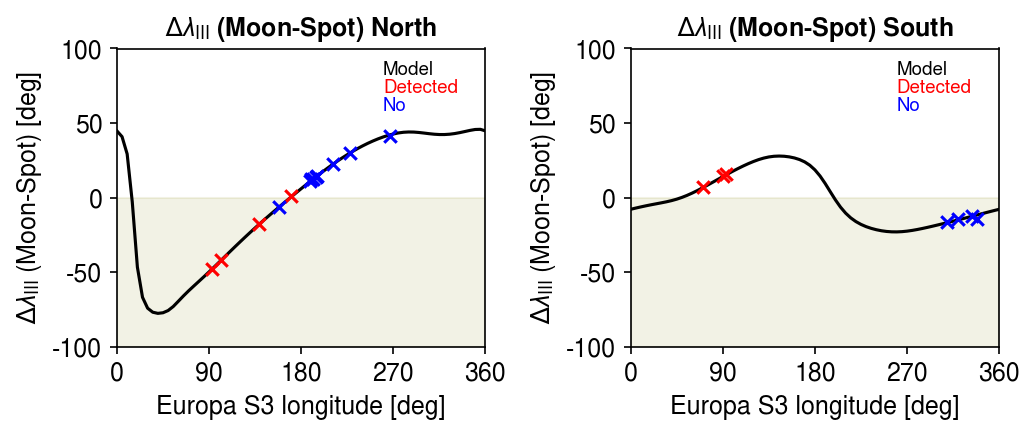

In [9]:
# 北半球
wlonN = copy.copy(satovalN.wlon)
euwlonN = copy.copy(satovalN.euwlon)
euwlonN[0:3] += -360

# 南半球
wlonS = copy.copy(satovalS.wlon)
euwlonS = copy.copy(satovalS.euwlon)
euwlonS[-2:] += 360

fontsize = 12
fig, ax = plt.subplots(1,2,figsize=(7,3),dpi=150)
# ax[0].set_aspect('equal')
ax[0].set_title('$\\Delta\\lambda_{\\mathrm{III}}$ (Moon-Spot) North', weight='bold', fontsize=fontsize)
ax[0].text(260, 82, 'Model', size=fontsize*0.75)
ax[0].text(260, 82-12, 'Detected', color='r', size=fontsize*0.75)
ax[0].text(260, 82-12*2, 'No', color='b', size=fontsize*0.75)
ax[0].set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax[0].set_ylabel('$\\Delta\\lambda_{\\mathrm{III}}$ (Moon-Spot) [deg]', fontsize=fontsize)
ax[0].set_xlim(0,360)
ax[0].set_ylim(-100,100)
ax[0].set_xticks(np.linspace(0,360,5))
ax[0].set_xticklabels(np.linspace(0,360,5,dtype=int))
ax[0].set_yticks(np.linspace(-100,100,5))
ax[0].set_yticklabels(np.linspace(-100,100,5,dtype=int))
ax[0].tick_params(axis='x', labelsize=fontsize)
ax[0].tick_params(axis='y', labelsize=fontsize)
ax[0].plot(wlonN, -(euwlonN-wlonN), color='k', zorder=0.5)

for i in range(OBS_s3moonN.size):
    ax[0].scatter(OBS_s3moonN[i], -(OBS_s3efpN[i]-OBS_s3moonN[i]), marker='x', color='r', zorder=1)
for i in range(NO_s3moonN.size):
    ax[0].scatter(NO_s3moonN[i], -(NO_s3efpN[i]-NO_s3moonN[i]), marker='x', color='b', zorder=1)
ax[0].axhspan(-100, 0, color='olive', alpha=0.10, zorder=0.1)

#ax1 = ax[0].twinx()
#ax1.set_ylabel('$B_r$ [nT]')
#ax1.plot(np.degrees(2*np.pi-phi),Br, color='gray', zorder=0.5)

# ax[0].set_box_aspect(1)

# ax[1].set_aspect('equal')
ax[1].set_title('$\\Delta\\lambda_{\\mathrm{III}}$ (Moon-Spot) South', weight='bold', fontsize=fontsize)
ax[1].text(260, 82, 'Model', size=fontsize*0.75)
ax[1].text(260, 82-12, 'Detected', color='r', size=fontsize*0.75)
ax[1].text(260, 82-12*2, 'No', color='b', size=fontsize*0.75)
ax[1].set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax[1].set_ylabel('$\\Delta\\lambda_{\\mathrm{III}}$ (Moon-Spot) [deg]', fontsize=fontsize)
ax[1].set_xlim(0,360)
ax[1].set_ylim(-100,100)
ax[1].set_xticks(np.linspace(0,360,5))
ax[1].set_xticklabels(np.linspace(0,360,5,dtype=int))
ax[1].set_yticks(np.linspace(-100,100,5))
ax[1].set_yticklabels(np.linspace(-100,100,5,dtype=int))
ax[1].tick_params(axis='x', labelsize=fontsize)
ax[1].tick_params(axis='y', labelsize=fontsize)
ax[1].plot(wlonS, -(euwlonS-wlonS), color='k', zorder=0.5)

for i in range(OBS_s3moonS.size):
    ax[1].scatter(OBS_s3moonS[i], -(OBS_s3efpS[i]-OBS_s3moonS[i]), marker='x', color='r', zorder=1)
for i in range(NO_s3moonS.size):
    ax[1].scatter(NO_s3moonS[i], -(NO_s3efpS[i]-NO_s3moonS[i]), marker='x', color='b', zorder=1)
ax[1].axhspan(-100, 0, color='olive', alpha=0.10, zorder=0.1)

#ax1 = ax[1].twinx()
#ax1.set_ylabel('$B_r$ [nT]')
#ax1.plot(np.degrees(2*np.pi-phi),Br, color='gray', zorder=0.5)

# ax[1].set_box_aspect(1)

fig.tight_layout()
plt.show()

北半球

/tmp/ipykernel_1426405/1785929824.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  pp = fig.colorbar(sm)


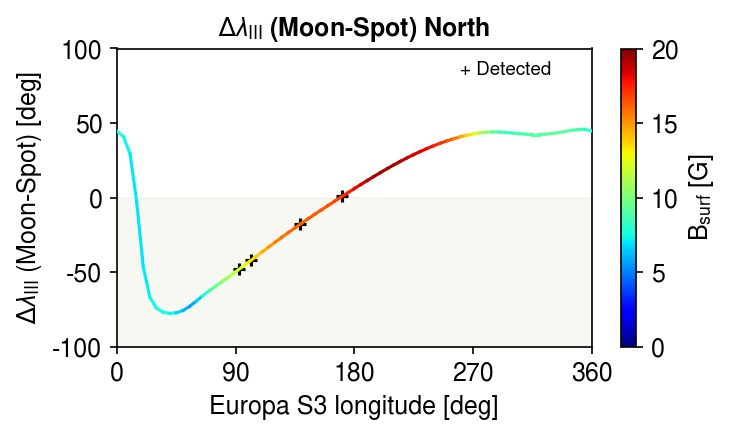

In [10]:
# 北半球
wlonN = copy.copy(satovalN.wlon)
euwlonN = copy.copy(satovalN.euwlon)
eulatN = copy.copy(satovalN.eulat)
euwlonN[0:3] += -360

# 表面磁場
RJ = 71492E+3           # JUPITER RADIUS [m]
B_surf = np.zeros(len(euwlonN))
for i in range(len(euwlonN)):
    lat = eulatN[i]
    wlong = euwlonN[i]
    # RADIUS OF SURFACE (1/15 DYNAMICALLY FLATTENED SURFACE)
    rs = RJ*np.sqrt(np.cos(np.radians(lat))**2 +
                    (np.sin(np.radians(lat))*14.4/15.4)**2)
    theta = np.radians(90-lat)
    phi = np.radians(360-wlong)
    Bvec = BJRM.B().JRM33(rs, theta, phi)
    B = math.sqrt(Bvec[0]**2+Bvec[1]**2+Bvec[2]**2)
    B_surf[i] = B

# Plot
fontsize = 12
fig, ax = plt.subplots(figsize=(5,3),dpi=150)
# ax[0].set_aspect('equal')
ax.set_title('$\\Delta\\lambda_{\\mathrm{III}}$ (Moon-Spot) North', weight='bold', fontsize=fontsize)
ax.text(260, 82, '+ Detected', size=fontsize*0.75)
ax.set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax.set_ylabel('$\\Delta\\lambda_{\\mathrm{III}}$ (Moon-Spot) [deg]', fontsize=fontsize)
ax.set_xlim(0,360)
ax.set_ylim(-100,100)
ax.set_xticks(np.linspace(0,360,5))
ax.set_xticklabels(np.linspace(0,360,5,dtype=int))
ax.set_yticks(np.linspace(-100,100,5))
ax.set_yticklabels(np.linspace(-100,100,5,dtype=int))
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

colormap = plt.get_cmap('jet')
ydata = B_surf*(1E-5)
norm = mpl.colors.Normalize(vmin=0, vmax=20)
ax.set_prop_cycle(color=[colormap(k) for k in norm(ydata)])
for j in range(len(ydata)-1):
    ax.plot(wlonN[j:j+2], -(euwlonN-wlonN)[j:j+2], zorder=5)

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])

for i in range(OBS_s3moonN.size):
    ax.scatter(OBS_s3moonN[i], -(OBS_s3efpN[i]-OBS_s3moonN[i]), marker='+', color='k', zorder=1)
# for i in range(NO_s3moonN.size):
#     ax[0].scatter(NO_s3moonN[i], -(NO_s3efpN[i]-NO_s3moonN[i]), marker='p', color='k', zorder=1)
ax.axhspan(-100, 0, color='olive', alpha=0.05, zorder=0.1)
pp = fig.colorbar(sm)
pp.ax.set_title(' ', fontsize=fontsize)
pp.set_label('B$_{\\mathrm{surf}}$ [G]', fontsize=fontsize)
pp.ax.tick_params(labelsize=fontsize)
fig.tight_layout()
plt.show()

/tmp/ipykernel_1426405/2075390458.py:66: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  pp = fig.colorbar(sm)


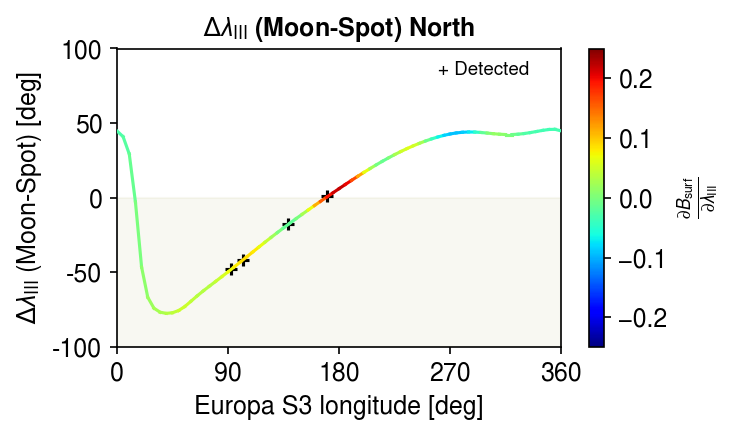

In [11]:
# 北半球
wlonN = copy.copy(satovalN.wlon)
euwlonN = copy.copy(satovalN.euwlon)
eulatN = copy.copy(satovalN.eulat)
euwlonN[0:3] += -360
delwlong = math.radians(0.5)  # [rad]

# 表面磁場
RJ = 71492E+3           # JUPITER RADIUS [m]
B_surf = np.zeros(len(euwlonN))
for i in range(len(euwlonN)):
    lat = eulatN[i]
    wlong = euwlonN[i]
    # RADIUS OF SURFACE (1/15 DYNAMICALLY FLATTENED SURFACE)
    rs = RJ*np.sqrt(np.cos(np.radians(lat))**2 +
                    (np.sin(np.radians(lat))*14.4/15.4)**2)
    theta = np.radians(90-lat)
    phi = np.radians(360-wlong)
    Bvec = BJRM.B().JRM33(rs, theta, phi)
    B1 = math.sqrt(Bvec[0]**2+Bvec[1]**2+Bvec[2]**2)

    wlong = euwlonN[i]+delwlong
    # RADIUS OF SURFACE (1/15 DYNAMICALLY FLATTENED SURFACE)
    rs = RJ*np.sqrt(np.cos(np.radians(lat))**2 +
                    (np.sin(np.radians(lat))*14.4/15.4)**2)
    theta = np.radians(90-lat)
    phi = np.radians(360-wlong)
    Bvec = BJRM.B().JRM33(rs, theta, phi)
    B2 = math.sqrt(Bvec[0]**2+Bvec[1]**2+Bvec[2]**2)


    B_surf[i] = (B2-B1)/(delwlong)

# Plot
fontsize = 12
fig, ax = plt.subplots(figsize=(5,3),dpi=150)
# ax[0].set_aspect('equal')
ax.set_title('$\\Delta\\lambda_{\\mathrm{III}}$ (Moon-Spot) North', weight='bold', fontsize=fontsize)
ax.text(260, 82, '+ Detected', size=fontsize*0.75)
ax.set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax.set_ylabel('$\\Delta\\lambda_{\\mathrm{III}}$ (Moon-Spot) [deg]', fontsize=fontsize)
ax.set_xlim(0,360)
ax.set_ylim(-100,100)
ax.set_xticks(np.linspace(0,360,5))
ax.set_xticklabels(np.linspace(0,360,5,dtype=int))
ax.set_yticks(np.linspace(-100,100,5))
ax.set_yticklabels(np.linspace(-100,100,5,dtype=int))
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

colormap = plt.get_cmap('jet')
ydata = B_surf*(1E-5)
norm = mpl.colors.Normalize(vmin=-0.25, vmax=0.25)
ax.set_prop_cycle(color=[colormap(k) for k in norm(ydata)])
for j in range(len(ydata)-1):
    ax.plot(wlonN[j:j+2], -(euwlonN-wlonN)[j:j+2], zorder=5)

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])

for i in range(OBS_s3moonN.size):
    ax.scatter(OBS_s3moonN[i], -(OBS_s3efpN[i]-OBS_s3moonN[i]), marker='+', color='k', zorder=1)
# for i in range(NO_s3moonN.size):
#     ax[0].scatter(NO_s3moonN[i], -(NO_s3efpN[i]-NO_s3moonN[i]), marker='p', color='k', zorder=1)
ax.axhspan(-100, 0, color='olive', alpha=0.05, zorder=0.1)
pp = fig.colorbar(sm)
pp.ax.set_title(' ', fontsize=fontsize)
pp.set_label(r'$\frac{\partial B_{\rm surf}}{\partial \lambda_{\rm III}}$', fontsize=fontsize)
pp.ax.tick_params(labelsize=fontsize)
fig.tight_layout()
plt.show()

南半球

/tmp/ipykernel_1426405/3010197752.py:54: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  pp = fig.colorbar(sm)


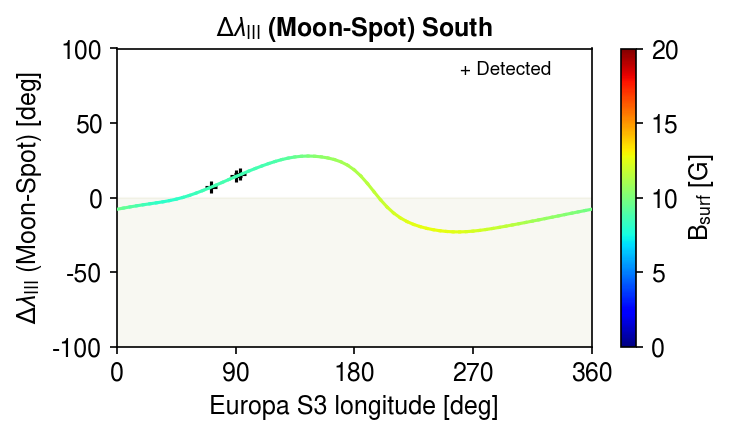

In [12]:
# 南半球
wlonS = copy.copy(satovalS.wlon)
euwlonS = copy.copy(satovalS.euwlon)
eulatS = copy.copy(satovalS.eulat)
euwlonS[-2:] += 360

# 表面磁場
RJ = 71492E+3           # JUPITER RADIUS [m]
B_surf = np.zeros(len(euwlonS))
for i in range(len(euwlonS)):
    lat = eulatS[i]
    wlong = euwlonS[i]
    # RADIUS OF SURFACE (1/15 DYNAMICALLY FLATTENED SURFACE)
    rs = RJ*np.sqrt(np.cos(np.radians(lat))**2 +
                    (np.sin(np.radians(lat))*14.4/15.4)**2)
    theta = np.radians(90-lat)
    phi = np.radians(360-wlong)
    Bvec = BJRM.B().JRM33(rs, theta, phi)
    B = math.sqrt(Bvec[0]**2+Bvec[1]**2+Bvec[2]**2)
    B_surf[i] = B

# Plot
fontsize = 12
fig, ax = plt.subplots(figsize=(5,3),dpi=150)
# ax[0].set_aspect('equal')
ax.set_title('$\\Delta\\lambda_{\\mathrm{III}}$ (Moon-Spot) South', weight='bold', fontsize=fontsize)
ax.text(260, 82, '+ Detected', size=fontsize*0.75)
ax.set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax.set_ylabel('$\\Delta\\lambda_{\\mathrm{III}}$ (Moon-Spot) [deg]', fontsize=fontsize)
ax.set_xlim(0,360)
ax.set_ylim(-100,100)
ax.set_xticks(np.linspace(0,360,5))
ax.set_xticklabels(np.linspace(0,360,5,dtype=int))
ax.set_yticks(np.linspace(-100,100,5))
ax.set_yticklabels(np.linspace(-100,100,5,dtype=int))
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

colormap = plt.get_cmap('jet')
ydata = B_surf*(1E-5)
norm = mpl.colors.Normalize(vmin=0, vmax=20)
ax.set_prop_cycle(color=[colormap(k) for k in norm(ydata)])
for j in range(len(ydata)-1):
    ax.plot(wlonS[j:j+2], -(euwlonS-wlonS)[j:j+2], zorder=5)

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])

for i in range(OBS_s3moonS.size):
    ax.scatter(OBS_s3moonS[i], -(OBS_s3efpS[i]-OBS_s3moonS[i]), marker='+', color='k', zorder=1)
# for i in range(NO_s3moonN.size):
#     ax[0].scatter(NO_s3moonN[i], -(NO_s3efpN[i]-NO_s3moonN[i]), marker='p', color='k', zorder=1)
ax.axhspan(-100, 0, color='olive', alpha=0.05, zorder=0.1)
pp = fig.colorbar(sm)
pp.ax.set_title(' ', fontsize=fontsize)
pp.set_label('B$_{\\mathrm{surf}}$ [G]', fontsize=fontsize)
pp.ax.tick_params(labelsize=fontsize)
fig.tight_layout()
plt.show()

/tmp/ipykernel_1426405/3892201759.py:65: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  pp = fig.colorbar(sm)


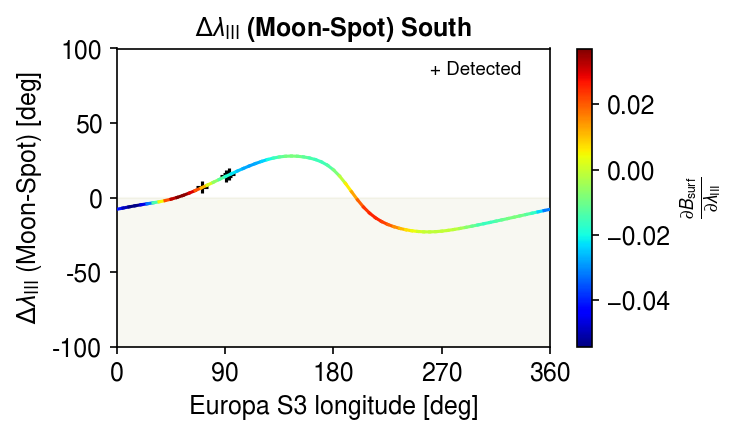

In [13]:
# 南半球
wlonS = copy.copy(satovalS.wlon)
euwlonS = copy.copy(satovalS.euwlon)
eulatS = copy.copy(satovalS.eulat)
euwlonS[-2:] += 360
delwlong = math.radians(0.5)  # [rad]

# 表面磁場
RJ = 71492E+3           # JUPITER RADIUS [m]
B_surf = np.zeros(len(euwlonS))
for i in range(len(euwlonS)):
    lat = eulatS[i]
    wlong = euwlonS[i]
    # RADIUS OF SURFACE (1/15 DYNAMICALLY FLATTENED SURFACE)
    rs = RJ*np.sqrt(np.cos(np.radians(lat))**2 +
                    (np.sin(np.radians(lat))*14.4/15.4)**2)
    theta = np.radians(90-lat)
    phi = np.radians(360-wlong)
    Bvec = BJRM.B().JRM33(rs, theta, phi)
    B1 = math.sqrt(Bvec[0]**2+Bvec[1]**2+Bvec[2]**2)

    wlong = euwlonS[i]+delwlong
    # RADIUS OF SURFACE (1/15 DYNAMICALLY FLATTENED SURFACE)
    rs = RJ*np.sqrt(np.cos(np.radians(lat))**2 +
                    (np.sin(np.radians(lat))*14.4/15.4)**2)
    theta = np.radians(90-lat)
    phi = np.radians(360-wlong)
    Bvec = BJRM.B().JRM33(rs, theta, phi)
    B2 = math.sqrt(Bvec[0]**2+Bvec[1]**2+Bvec[2]**2)

    B_surf[i] = (B2-B1)/delwlong

# Plot
fontsize = 12
fig, ax = plt.subplots(figsize=(5,3),dpi=150)
# ax[0].set_aspect('equal')
ax.set_title('$\\Delta\\lambda_{\\mathrm{III}}$ (Moon-Spot) South', weight='bold', fontsize=fontsize)
ax.text(260, 82, '+ Detected', size=fontsize*0.75)
ax.set_xlabel('Europa S3 longitude [deg]', fontsize=fontsize)
ax.set_ylabel('$\\Delta\\lambda_{\\mathrm{III}}$ (Moon-Spot) [deg]', fontsize=fontsize)
ax.set_xlim(0,360)
ax.set_ylim(-100,100)
ax.set_xticks(np.linspace(0,360,5))
ax.set_xticklabels(np.linspace(0,360,5,dtype=int))
ax.set_yticks(np.linspace(-100,100,5))
ax.set_yticklabels(np.linspace(-100,100,5,dtype=int))
ax.tick_params(axis='x', labelsize=fontsize)
ax.tick_params(axis='y', labelsize=fontsize)

colormap = plt.get_cmap('jet')
ydata = B_surf*(1E-5)
norm = mpl.colors.Normalize(vmin=None, vmax=None)
ax.set_prop_cycle(color=[colormap(k) for k in norm(ydata)])
for j in range(len(ydata)-1):
    ax.plot(wlonS[j:j+2], -(euwlonS-wlonS)[j:j+2], zorder=5)

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])

for i in range(OBS_s3moonS.size):
    ax.scatter(OBS_s3moonS[i], -(OBS_s3efpS[i]-OBS_s3moonS[i]), marker='+', color='k', zorder=1)
# for i in range(NO_s3moonN.size):
#     ax[0].scatter(NO_s3moonN[i], -(NO_s3efpN[i]-NO_s3moonN[i]), marker='p', color='k', zorder=1)
ax.axhspan(-100, 0, color='olive', alpha=0.05, zorder=0.1)
pp = fig.colorbar(sm)
pp.ax.set_title(' ', fontsize=fontsize)
pp.set_label(r'$\frac{\partial B_{\rm surf}}{\partial \lambda_{\rm III}}$', fontsize=fontsize)
pp.ax.tick_params(labelsize=fontsize)
fig.tight_layout()
plt.show()

入力: EFP発光位置の緯度経度 (木星表面)

出力: 入力位置から伸びる瞬時磁力線のEuropa公転軌道における緯度経度

In [14]:
def trace_magline(lat, wlong, ds):
    """
    ### Parameters
    `lat` ... latitude of the starting point \\
    `wlong` ... west longitude of the starting point \\

    ### Returns
    
    """
    # ds = 10000  # [m] ?

    # RADIUS OF SURFACE (1/15 DYNAMICALLY FLATTENED SURFACE)
    rs = RJ*np.sqrt(np.cos(np.radians(lat))**2 +
                    (np.sin(np.radians(lat))*14.4/15.4)**2)
    rs += 900E+3    # 900 km altitude
    theta = np.radians(90-lat)
    phi = np.radians(360-wlong)

    x = rs*math.sin(theta)*math.cos(phi)
    y = rs*math.sin(theta)*math.sin(phi)
    z = rs*math.cos(theta)

    # print('Start: ', rs/RJ, z/RJ, math.degrees(0.5*np.pi-theta), math.degrees(2*np.pi-phi))

    for _ in range(650000):
        B = BJRM.B().JRM33(rs, theta, phi)*1E-9        # [T]

        Bx = B[0]*math.sin(theta)*math.cos(phi) + B[1]*math.cos(theta)*math.cos(phi) - B[2]*math.sin(phi)
        By = B[0]*math.sin(theta)*math.sin(phi) + B[1]*math.cos(theta)*math.sin(phi) + B[2]*math.cos(phi)
        Bz = B[0]*math.cos(theta) - B[1]*math.sin(theta)

        Bcs = BJRM.B().BCS(x, y, z, phi)  # [nT]
        Bx += Bcs[0]*1E-9       # [T]
        By += Bcs[1]*1E-9       # [T]
        Bz += Bcs[2]*1E-9       # [T]
        
        B0 = math.sqrt(Bx**2 + By**2 + Bz**2)

        dx = ds*Bx/B0
        dy = ds*By/B0
        dz = ds*Bz/B0

        x += dx
        y += dy
        z += dz

        rs = math.sqrt(x**2 + y**2 + z**2)
        theta = math.acos(z/rs)
        phi = math.atan2(y,x)
        # print(rs/RJ, math.degrees(theta), math.degrees(phi))

        if z<0:
            break
    
    x = rs*math.sin(theta)*math.cos(phi)
    y = rs*math.sin(theta)*math.sin(phi)
    z = rs*math.cos(theta)
    # print(Bz*1E-5)

    S3wlon = math.degrees(2*np.pi-phi)
    print('Equator: ', rs/RJ, math.degrees(theta), math.degrees(phi), S3wlon)

    return S3wlon

# trace_magline(51.5855, 156.114, ds=10000)
trace_magline(83.96, 315.19, ds=20000)  # JRM33 reference
trace_magline(83.96, 315.19, ds=50000)  # JRM33 reference

Equator:  10.098468753897267 90.00043509281139 -0.7028131760834334 360.70281317608345
Equator:  10.103412207483345 90.00242717502336 -0.7104978824645749 360.71049788246455


360.71049788246455

In [15]:
def trace_maglineUP(rs, lat, wlong, ds):
    """
    ### Parameters
    `lat` ... latitude of the starting point \\
    `wlong` ... west longitude of the starting point \\

    ### Returns
    
    """
    # ds = 10000  # [m] ?

    # RADIUS OF SURFACE (1/15 DYNAMICALLY FLATTENED SURFACE)
    theta = np.radians(90-lat)
    phi = np.radians(360-wlong)

    x = rs*math.sin(theta)*math.cos(phi)
    y = rs*math.sin(theta)*math.sin(phi)
    z = rs*math.cos(theta)

    # print('Start: ', rs/RJ, z/RJ, math.degrees(0.5*np.pi-theta), math.degrees(2*np.pi-phi))

    for _ in range(650000):
        B = BJRM.B().JRM33(rs, theta, phi)*1E-9        # [T]

        Bx = B[0]*math.sin(theta)*math.cos(phi) + B[1]*math.cos(theta)*math.cos(phi) - B[2]*math.sin(phi)
        By = B[0]*math.sin(theta)*math.sin(phi) + B[1]*math.cos(theta)*math.sin(phi) + B[2]*math.cos(phi)
        Bz = B[0]*math.cos(theta) - B[1]*math.sin(theta)

        Bcs = BJRM.B().BCS(x, y, z, phi)  # [nT]
        Bx += Bcs[0]*1E-9       # [T]
        By += Bcs[1]*1E-9       # [T]
        Bz += Bcs[2]*1E-9       # [T]
        
        B0 = math.sqrt(Bx**2 + By**2 + Bz**2)
        
        dx = ds*Bx/B0
        dy = ds*By/B0
        dz = ds*Bz/B0

        x += dx
        y += dy
        z += dz

        rs = math.sqrt(x**2 + y**2 + z**2)
        theta = math.acos(z/rs)
        phi = math.atan2(y,x)
        # print(rs/RJ, math.degrees(theta), math.degrees(phi))

        rsurf = RJ*np.sqrt(np.cos(np.radians(lat))**2 +
                        (np.sin(np.radians(lat))*14.4/15.4)**2)
        # rsurf += 900E+3    # 900 km altitude

        if rs<rsurf:
            break

    S3wlon = math.degrees(2*np.pi-phi)
    print('Equator: ', rs/RJ, 90-math.degrees(theta), math.degrees(phi), S3wlon)

    return S3wlon

# trace_magline(51.5855, 156.114, ds=10000)
trace_maglineUP(9.4*RJ, 0.001, 15, ds=-20000)  # JRM33 reference
trace_maglineUP(9.4*RJ, 0.001, 15, ds=-50000)  # JRM33 reference

Equator:  0.9997937360821577 85.87788995042615 -21.665420818836076 381.6654208188361
Equator:  0.9993535353452538 85.89124355885804 -21.67092848778752 381.6709284877875


381.6709284877875

In [16]:
bon17_efp = np.loadtxt('data/Bonfond_etal_2017/jgra53671-sup-0006-DataSetS3.txt',
           skiprows=1,
           usecols=(3,4,5,6,7,8,9))
lon_eur17 = bon17_efp[:,0]
lon_efp17 = bon17_efp[:,1]
lat_efp17 = bon17_efp[:,2]
lon_efp17_pl = bon17_efp[:,3]
lon_efp17_mn = bon17_efp[:,4]
lat_efp17_pl = bon17_efp[:,5]
lat_efp17_mn = bon17_efp[:,6]
eqwlon_efp17 = np.zeros(lon_efp17.shape)
# for jj in range(lon_efp17.size):
#     eqwlon_efp17[jj] = trace_magline(lat_efp17_pl[jj], lon_efp17_mn[jj], ds=40000)
#     print(lon_eur17[jj], eqwlon_efp17[jj], lat_efp17_pl[jj], lon_efp17_mn[jj])

In [17]:
# np.savetxt('Bon17_leadangle_mn.txt', np.array([lon_eur17, eqwlon_efp17]))